In [1]:
from acne_detection import AcneDetector
from age_gender_estimation import AgeGenderEstimator
from dark_eye_detection import DarkEyeDetector
from facial_landmark import FacialLandmark
from wrinkles_detection import WrinklesDetector
from recommendation_system import ProductRecommendation
import cv2
import matplotlib.pyplot as plt
from sallowness_detection import get_sallowness_score
from main import SkinCareAdvisor

c:\users\denis\anaconda3\envs\fyp\lib\site-packages\cntk\cntk_py_init.py:84: UserWarning: 

################################################ Missing optional dependency (GPU-Specific) ################################################
   CNTK may crash if the component that depends on those dependencies is loaded.
   Visit https://docs.microsoft.com/en-us/cognitive-toolkit/Setup-Windows-Python#optional-gpu-specific-packages for more information.
############################################################################################################################################
If you intend to use CNTK without GPU support, you can ignore the (likely) GPU-specific warning!
############################################################################################################################################

  warnings.warn(WARNING_MSG_GPU_ONLY % ('GPU-Specific', 'https://docs.microsoft.com/en-us/cognitive-toolkit/Setup-Windows-Python#optional-gpu-specific-packages'))
[nltk_dat

In [2]:
import cv2
import time

q = {
    'age' : 21,
    'skin_type': "normal",
    'allergies': None,
    'price': None,
    'concerns': ["acne", "dark_eye", "oiliness"],
    'preferences': None
}
image = cv2.imread("./test_images/image2.jpg")
start_time = time.time()
sca = SkinCareAdvisor(q, image)
print("Time full pipeline", time.time() - start_time, "second(s)")

c:\users\denis\anaconda3\envs\fyp\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\denis\anaconda3\envs\fyp\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LinearRegression from version 0.20.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\users\denis\anaconda3\envs\fyp\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neural_network.multilayer_perceptron module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from s

Time full pipeline 6.243500232696533 second(s)


In [2]:
def showImage(title, image):
#     pass
    cv2.imshow(title, image)
    cv2.moveWindow(title,0,0)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def printImage(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.show()

def plot_color(r, g, b):
    plt.imshow([[(r/255, g/255, b/255)]])
    plt.show()

In [3]:
file_path = "./test_images/image00.jpg"
ori_img = cv2.imread(file_path)

# Facial Landmark

In [4]:
fl = FacialLandmark(ori_img)

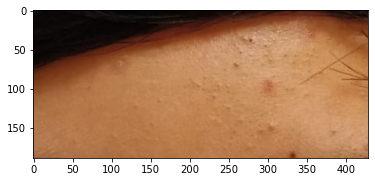

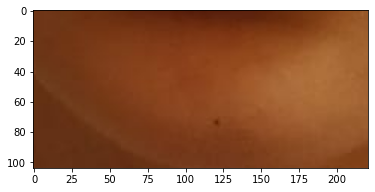

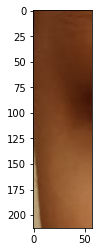

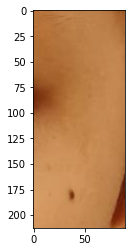

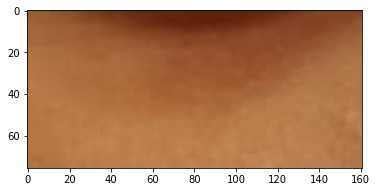

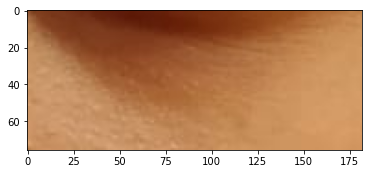

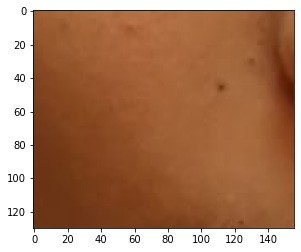

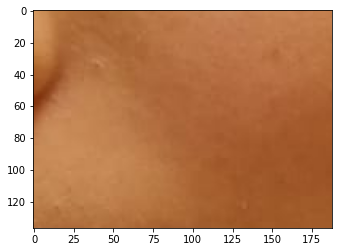

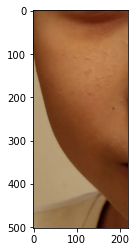

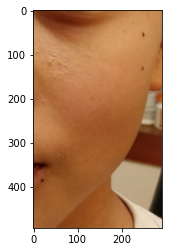

In [5]:
printImage(fl.get_forehead_region())
printImage(fl.get_chin_region())
r_cr, l_cr = fl.get_crows_feet_region()
printImage(r_cr)
printImage(l_cr)
r_cr, l_cr = fl.get_below_eyes_region()
printImage(r_cr)
printImage(l_cr)
r_cr, l_cr = fl.get_nasal_junction_region()
printImage(r_cr)
printImage(l_cr)
r_cr, l_cr = fl.get_cheeks_region()
printImage(r_cr)
printImage(l_cr)

# Age Gender

In [6]:
ag = AgeGenderEstimator(fl)
ag.predict_age_gender()

(18, 'F')

# Dark Eye

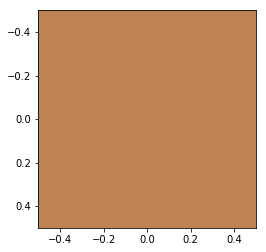

skin tone


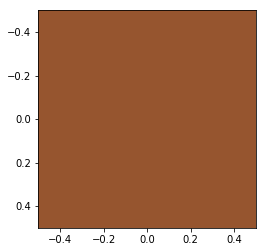

right dark eye


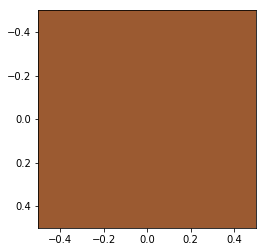

left dark eye
Score 1.0356475346392966


In [7]:
de = DarkEyeDetector(fl)
plot_color(*de.get_skin_tone())
print("skin tone")
r, l = de.get_dark_eyes()
plot_color(*r)
print("right dark eye")
plot_color(*l)
print("left dark eye")
print("Score", de.get_score())

# Acne

In [8]:
ad = AcneDetector(fl)

In [9]:
print("forehead", ad.get_forehead_score())
print("cheeks", ad.get_cheeks_score()[0], ad.get_cheeks_score()[1])
print("chin", ad.get_chin_score())
print("Overall score", ad.get_overall_score())

forehead 1.209
cheeks 0.006999999999999895 0.0029999999999998916
chin 0.04299999999999993
Overall score 0.315


# Wrinkles

In [10]:
wd = WrinklesDetector(fl)
wd.get_overall_score()

0.225

In [11]:
r, l, _ = wd.get_crows_feet()
print("Crow's feet", r[1],"and",  l[1])
print("Overall Crow's feet", _)
print("Forehead", wd.get_forehead()[1])
r, l, _ = wd.get_below_eyes()
print("Below eyes", r[1],"and", l[1])
r, l, _ = wd.get_nasal_lines()
print("Nasal Lines", r[1],"and", l[1])

print("Overall Score", wd.get_overall_score())

Crow's feet 0.5 and 0
Overall Crow's feet 0
Forehead 0.5
Below eyes 0 and 0.5
Nasal Lines 0 and 0
Overall Score 0.225


# Sallowness

In [12]:
get_sallowness_score(14,18)

0.8

# Recommendation System

In [7]:
import pandas as pd

In [22]:
main_input = {
    'acne': 0.315,
    'wrinkles': 0.225,
    'crows_feet': 0,
    'dark_eye': 1.04,
    'sallowness': 0.8,
    'skin_type': "normal",
    'allergies': None,
    'price': None,
    'concerns': ["acne", "dark_eye", "oiliness"],
    'preferences': None
}

In [23]:
prod_cat = pd.read_csv("product_catalogue.csv")
prod_rec = ProductRecommendation(prod_cat, main_input)

In [25]:
rec = prod_rec.get_default_recommendation()

In [11]:
rec['acne']['Cleanser']

,Label,URL,brand,name,price,rating,description,skin_type,skincare_concerns,ingredients,...,wrinkles,oiliness,dullness,dark_spots,pores,redness,acne,uneven_skin_tone,sallowness,class_specified
0,Cleanser,https://www.sephora.com/product/the-ordinary-d...,THE ORDINARY,Glycolic Acid 7% Toning Solution,8.7,4.5,An exfoliating toning solution with seven perc...,"[1, 1, 1, 1, 1]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]","water, glycolic acid, rosa damascena flower wa...",...,0,0,1,0,0,0,0,0,0,dullness
1,Cleanser,https://www.sephora.com/product/renewing-clean...,PROACTIV,Renewing Cleanser,25.0,4.8,An acne-fighting cleanser that helps to wash a...,"[1, 1, 1, 0, 0]","[0, 0, 1, 0, 0, 1, 0, 1, 0, 0]","water, magnesium aluminum silicate, glyceryl s...",...,0,1,0,0,1,0,1,0,0,acne
2,Cleanser,https://www.sephora.com/product/ole-henriksen-...,OLEHENRIKSEN,Truth Juice™ Daily Cleanser,28.0,4.6,A juice cleanse you can commit to: Truth Juice...,"[1, 1, 1, 1, 0]","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0]","aqua/water/eau, sodium cocoyl isethionate, sod...",...,0,0,1,0,0,0,0,0,0,dullness
3,Cleanser,https://www.sephora.com/product/revitalizing-t...,PROACTIV,Revitalizing Toner,25.0,4.8,An alcohol-free toner developed by dermatologi...,"[1, 1, 1, 1, 0]","[1, 0, 0, 1, 0, 1, 0, 0, 0, 0]","water, glycolic acid, sodium hydroxide, polyso...",...,0,0,1,0,1,0,0,0,0,dullness
4,Cleanser,https://www.sephora.com/product/glycolic-acid-...,THE INKEY LIST,Glycolic Acid Exfoliating Toner,10.0,4.7,A 10 percent glycolic acid exfoliating toner t...,"[1, 1, 1, 1, 0]","[0, 1, 0, 1, 1, 0, 0, 0, 0, 0]","water, glycolic acid, propanediol, hamamelis v...",...,1,0,1,1,0,0,0,0,0,dullness
5,Cleanser,https://www.sephora.com/product/purity-made-si...,PHILOSOPHY,Purity Made Simple Micellar Cleansing Water Mini,12.0,5.0,"A cleansing water that removes makeup, dirt, a...","[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","water, poloxamer 184, phenoxyethanol, ppg-1-pe...",...,0,0,0,0,0,0,0,0,0,NaN
6,Cleanser,https://www.sephora.com/product/tarte-knockout...,TARTE,knockout daily exfoliating cleanser,12.0,5.0,A vegan AHA and BHA cleanser that helps dissol...,"[1, 1, 1, 0, 0]","[1, 0, 0, 0, 0, 1, 0, 1, 0, 0]","water/aqua/eau, sodium c14-16 olefin sulfonate...",...,0,0,0,0,1,0,1,0,0,pores
7,Cleanser,https://www.sephora.com/product/breakout-clear...,DERMALOGICA,Breakout Clearing All Over Toner,19.0,4.7,"A paraben-free and sulfate-free, mist-all-over...","[1, 1, 1, 0, 0]","[0, 0, 1, 0, 0, 1, 0, 0, 0, 0]","water, hamamelis virginiana water, isoceteth-2...",...,0,1,0,0,1,0,0,0,0,pores
8,Cleanser,https://www.sephora.com/product/the-deep-clean...,TATCHA,The Deep Cleanse Exfoliating Cleanser,38.0,4.3,A daily gel cleanser with natural fruit exfoli...,"[1, 1, 1, 0, 1]","[0, 0, 1, 1, 0, 1, 0, 0, 0, 0]","water, sodium cocoyl glutamate, propanediol, g...",...,0,1,1,0,1,0,0,0,0,pores
9,Cleanser,https://www.sephora.com/product/kale-spinach-g...,YOUTH TO THE PEOPLE,Superfood Antioxidant Cleanser,36.0,4.3,A daily green juice cleanse for your face with...,"[1, 1, 1, 1, 0]","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0]","water, sodium cocoyl glutamate, cocamidopropyl...",...,1,1,1,0,0,0,0,0,0,pores


In [16]:
rec['acne'].iloc[:, :11]

,Label,URL,brand,name,price,rating,description,skin_type,skincare_concerns,ingredients,likes
0,Cleanser,https://www.sephora.com/product/the-ordinary-d...,THE ORDINARY,Glycolic Acid 7% Toning Solution,8.7,4.5,An exfoliating toning solution with seven perc...,"[1, 1, 1, 1, 1]","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]","water, glycolic acid, rosa damascena flower wa...",172100
1,Cleanser,https://www.sephora.com/product/renewing-clean...,PROACTIV,Renewing Cleanser,25.0,4.8,An acne-fighting cleanser that helps to wash a...,"[1, 1, 1, 0, 0]","[0, 0, 1, 0, 0, 1, 0, 1, 0, 0]","water, magnesium aluminum silicate, glyceryl s...",872
2,Cleanser,https://www.sephora.com/product/ole-henriksen-...,OLEHENRIKSEN,Truth Juice™ Daily Cleanser,28.0,4.6,A juice cleanse you can commit to: Truth Juice...,"[1, 1, 1, 1, 0]","[1, 0, 0, 1, 0, 0, 0, 0, 0, 0]","aqua/water/eau, sodium cocoyl isethionate, sod...",15200
3,Cleanser,https://www.sephora.com/product/revitalizing-t...,PROACTIV,Revitalizing Toner,25.0,4.8,An alcohol-free toner developed by dermatologi...,"[1, 1, 1, 1, 0]","[1, 0, 0, 1, 0, 1, 0, 0, 0, 0]","water, glycolic acid, sodium hydroxide, polyso...",633
4,Cleanser,https://www.sephora.com/product/glycolic-acid-...,THE INKEY LIST,Glycolic Acid Exfoliating Toner,10.0,4.7,A 10 percent glycolic acid exfoliating toner t...,"[1, 1, 1, 1, 0]","[0, 1, 0, 1, 1, 0, 0, 0, 0, 0]","water, glycolic acid, propanediol, hamamelis v...",6400
5,Cleanser,https://www.sephora.com/product/purity-made-si...,PHILOSOPHY,Purity Made Simple Micellar Cleansing Water Mini,12.0,5.0,"A cleansing water that removes makeup, dirt, a...","[1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","water, poloxamer 184, phenoxyethanol, ppg-1-pe...",0
6,Cleanser,https://www.sephora.com/product/tarte-knockout...,TARTE,knockout daily exfoliating cleanser,12.0,5.0,A vegan AHA and BHA cleanser that helps dissol...,"[1, 1, 1, 0, 0]","[1, 0, 0, 0, 0, 1, 0, 1, 0, 0]","water/aqua/eau, sodium c14-16 olefin sulfonate...",1600
7,Cleanser,https://www.sephora.com/product/breakout-clear...,DERMALOGICA,Breakout Clearing All Over Toner,19.0,4.7,"A paraben-free and sulfate-free, mist-all-over...","[1, 1, 1, 0, 0]","[0, 0, 1, 0, 0, 1, 0, 0, 0, 0]","water, hamamelis virginiana water, isoceteth-2...",2800
8,Cleanser,https://www.sephora.com/product/the-deep-clean...,TATCHA,The Deep Cleanse Exfoliating Cleanser,38.0,4.3,A daily gel cleanser with natural fruit exfoli...,"[1, 1, 1, 0, 1]","[0, 0, 1, 1, 0, 1, 0, 0, 0, 0]","water, sodium cocoyl glutamate, propanediol, g...",94300
9,Cleanser,https://www.sephora.com/product/kale-spinach-g...,YOUTH TO THE PEOPLE,Superfood Antioxidant Cleanser,36.0,4.3,A daily green juice cleanse for your face with...,"[1, 1, 1, 1, 0]","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0]","water, sodium cocoyl glutamate, cocamidopropyl...",79100


In [26]:
rec.keys()

dict_keys(['acne', 'dark_eye', 'oiliness'])

In [27]:
rec['oiliness']

,Label,URL,brand,name,price,rating,description,skin_type,skincare_concerns,ingredients,...,wrinkles,oiliness,dullness,dark_spots,pores,redness,acne,uneven_skin_tone,sallowness,class_specified
0,Cleanser,https://www.sephora.com/product/renewing-clean...,PROACTIV,Renewing Cleanser,25.0,4.8,An acne-fighting cleanser that helps to wash a...,"[1, 1, 1, 0, 0]","[0, 0, 1, 0, 0, 1, 0, 1, 0, 0]","water, magnesium aluminum silicate, glyceryl s...",...,0,1,0,0,1,0,1,0,0,acne
1,Cleanser,https://www.sephora.com/product/breakout-clear...,DERMALOGICA,Breakout Clearing All Over Toner,19.0,4.7,"A paraben-free and sulfate-free, mist-all-over...","[1, 1, 1, 0, 0]","[0, 0, 1, 0, 0, 1, 0, 0, 0, 0]","water, hamamelis virginiana water, isoceteth-2...",...,0,1,0,0,1,0,0,0,0,pores
2,Cleanser,https://www.sephora.com/product/the-deep-clean...,TATCHA,The Deep Cleanse Exfoliating Cleanser,38.0,4.3,A daily gel cleanser with natural fruit exfoli...,"[1, 1, 1, 0, 1]","[0, 0, 1, 1, 0, 1, 0, 0, 0, 0]","water, sodium cocoyl glutamate, propanediol, g...",...,0,1,1,0,1,0,0,0,0,pores
3,Cleanser,https://www.sephora.com/product/kale-spinach-g...,YOUTH TO THE PEOPLE,Superfood Antioxidant Cleanser,36.0,4.3,A daily green juice cleanse for your face with...,"[1, 1, 1, 1, 0]","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0]","water, sodium cocoyl glutamate, cocamidopropyl...",...,1,1,1,0,0,0,0,0,0,pores
4,Cleanser,https://www.sephora.com/product/beste-no-9-jel...,DRUNK ELEPHANT,Beste™ No. 9 Jelly Cleanser,32.0,4.0,An innovative jelly cleanser that removes all ...,"[1, 1, 1, 0, 1]","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]","water, glycerin, cocamidopropyl betaine, coco-...",...,0,1,0,0,0,0,0,0,0,oiliness
5,Cleanser,https://www.sephora.com/product/salicylic-acid...,THE INKEY LIST,Salicylic Acid Acne + Pore Cleanser,9.0,4.1,A lightly-foaming cleanser that removes makeup...,"[1, 1, 1, 0, 0]","[0, 0, 1, 0, 0, 1, 0, 1, 0, 0]","water, glycerin, sodium methyl cocoyl taurate,...",...,0,1,0,0,1,0,1,0,0,acne
6,Cleanser,https://www.sephora.com/product/acne-solutions...,CLINIQUE,Acne Solutions Clarifying Lotion,17.0,4.4,A medicated formula that exfoliates and reduce...,"[1, 1, 1, 1, 0]","[0, 0, 1, 0, 0, 1, 0, 1, 0, 0]","water , alcohol denat., nylon-12, butylene gly...",...,0,1,0,0,1,0,1,0,0,oiliness
7,Cleanser,https://www.sephora.com/product/black-charcoal...,BOSCIA,Black Charcoal Blotting Linens,10.0,4.3,A set of purse-friendly blotting sheets powere...,"[1, 1, 1, 1, 0]","[0, 0, 1, 0, 0, 1, 0, 0, 0, 0]","natural abaca leaf fiber, black bamboo charcoal.",...,0,1,0,0,1,0,0,0,0,oiliness
8,Cleanser,https://www.sephora.com/product/triple-action-...,SEPHORA COLLECTION,Triple Action Cleansing Water - Cleanse + Purify,12.0,4.3,"A cleansing water, formulated with zinc and al...","[1, 1, 1, 1, 0]","[0, 0, 1, 0, 0, 1, 0, 0, 0, 0]","aqua (water), butylene glycol, glycerin, propa...",...,0,1,0,0,1,0,0,0,0,pores
9,Cleanser,https://www.sephora.com/product/tangerine-brig...,INNISFREE,Tangerine Brightening & Pore-Refining Cleanser,15.0,4.1,"A clay-infused, foaming cleanser, enriched wit...","[1, 1, 1, 1, 0]","[0, 0, 1, 1, 0, 1, 0, 0, 0, 0]","glycerin, water, stearic acid, myristic acid, ...",...,0,1,1,0,1,0,0,0,0,pores
